In [1]:
import pandas as pd
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import numpy as np

In [2]:
def stop_word(text):
    stopwords = nltk.corpus.stopwords.words('english')
    stopwords += ['shall','may','would']
    content = [w for w in text if w not in stopwords]
    return content

In [3]:
def find_bigrams(words): #try using zip instead
    bigram_list =[]
    for i in range(len(words) - 1):
        bigram_list.append((words[i],words[i+1]))
    return bigram_list    

def find_bigrams_zip_method(input_list):
    return zip(input_list, input_list[1:])

In [4]:


#Find the top 10 words 
state_union = pd.read_csv('data/state-of-the-union.csv',index_col=False,header = None,encoding='utf8')
#ss = state_union[(state_union[0] >=2010) & (state_union[0] <= 2011)]

ss= state_union
tokens=[]
speech_length = []
bigrams=[]
su_data =[]
for i in range(len(ss)):
    sen_lower = str(ss.loc[ss.index[i]][1]).lower()
    
    #Find sentences and remove punctuation
    sen= nltk.tokenize.sent_tokenize(sen_lower)    
    sen_no_punctuation = str(sen).translate(None,string.punctuation)
    
    #Tokenize and remove stop words
    tokens_no_sw = stop_word(nltk.tokenize.word_tokenize(sen_no_punctuation)) 
    tokens.append(tokens_no_sw) # can also use extend instead of append
    bigrams.append(find_bigrams(tokens_no_sw))
    
    pres_name = ss[1][i].split('\n')[2]
    avg_words = len(tokens_no_sw)/len(sen) 
    speech_length.append([ss[0][i],len(sen),avg_words]) #Contains year, sentence length and avg words per sentence
    su_data.append([ss[0][i],pres_name,tokens_no_sw,len(set(tokens_no_sw))])
    
  

In [5]:
ss.head()

,0,1
0,1790,"George Washington\nJanuary 8, 1790\n\nFellow-C..."
1,1790,\nState of the Union Address\nGeorge Washingto...
2,1791,\nState of the Union Address\nGeorge Washingto...
3,1792,\nState of the Union Address\nGeorge Washingto...
4,1793,\nState of the Union Address\nGeorge Washingto...


In [6]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [7]:
ps = PorterStemmer()
lmtzr = WordNetLemmatizer()
tdict = {}
for ind in tokens:
    for t in ind:
        #t = lmtzr.lemmatize(t)
        if t not in tdict:
            tdict[t] = 1
        else:
            tdict[t] = tdict[t] + 1
word_count = pd.DataFrame.from_dict(tdict,orient='index')       
word_count.columns = ['count']
word_count = word_count.sort('count',ascending=False)
word_count.head()

,count
government,5396
states,5394
congress,4085
united,3901
upon,3440


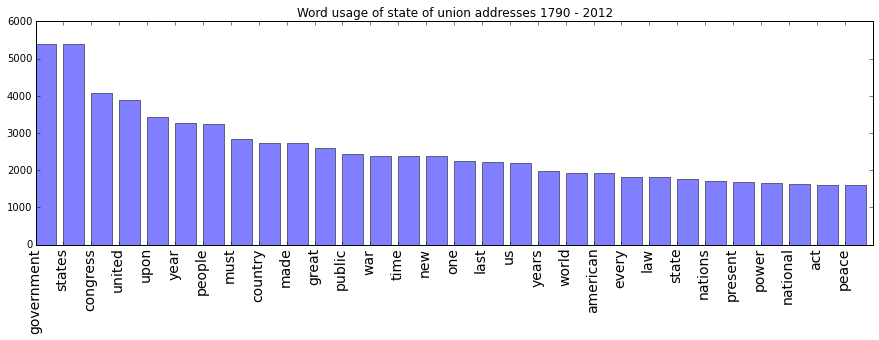

In [8]:
words_top30 = word_count.head(30)
fig, axes = plt.subplots(1,figsize=(15,4))
x= range(len(words_top30))
y = words_top30['count']
plt.bar(x,y, width=0.75, alpha=0.5)
axes.set_title("Word usage of state of union addresses 1790 - 2012")
axes.set_xticks(x)
xtickNames = axes.set_xticklabels(words_top30.index)
plt.setp(xtickNames, rotation=90, fontsize=14)
plt.show()


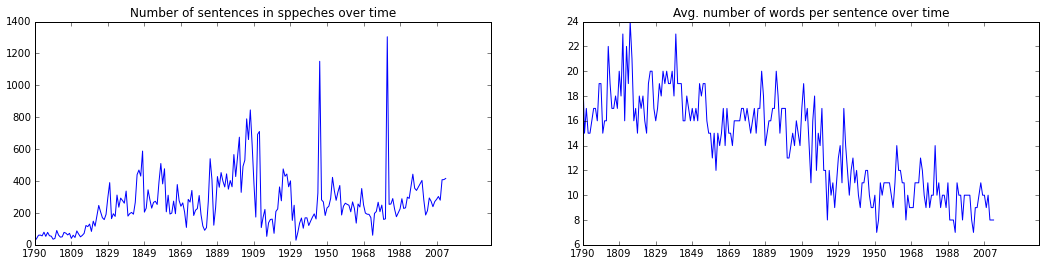

In [9]:
fig,axes = plt.subplots(1,2,figsize = (18,4))
n = len(speech_length)
x = range(n)
num_sentences = [s[1] for s in speech_length]
avg_word_count = [s[2] for s in speech_length]
x_names = [s[0] for s in speech_length]

axes[0].plot(x,num_sentences)  
axes[0].set_title('Number of sentences in sppeches over time')
axes[0].set_xticks(x[0:n:20])
axes[0].set_xticklabels(x_names[0:n:20])

axes[1].plot(x,avg_word_count)
axes[1].set_title('Avg. number of words per sentence over time')
axes[1].set_xticks(x[0:n:20])
axes[1].set_xticklabels(x_names[0:n:20])
plt.show()



In [10]:
#Find bigram counts
bdict = {}
for bigram in bigrams:
    for b in bigram:
        if b not in bdict:
            bdict[b] = 1
        else:
            bdict[b] = bdict[b] + 1
bigram_count = pd.DataFrame.from_dict(bdict,orient='index')       
bigram_count.columns = ['count']
bigram_count= bigram_count.sort('count',ascending=False)


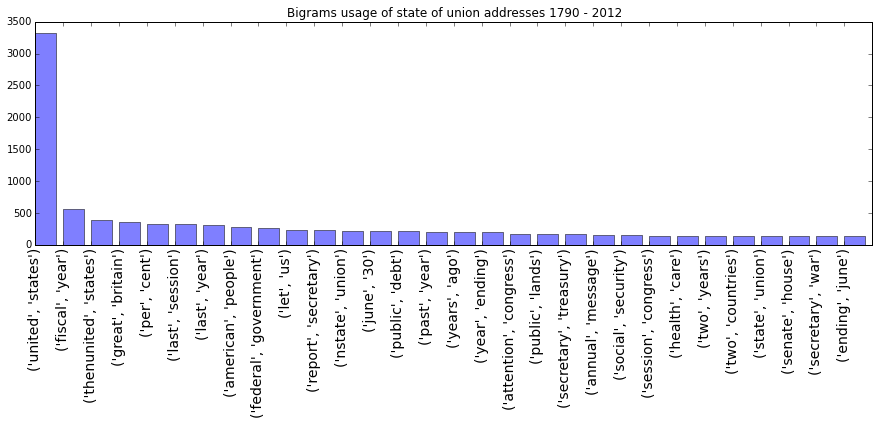

In [11]:
#Plot top 30 bigrams usage over time
bigrams_top30 = bigram_count.head(30)
fig, axes = plt.subplots(1,figsize=(15,4))
x= range(len(bigrams_top30))
y = bigrams_top30['count']
plt.bar(x,y, width=0.75, alpha=0.5)
axes.set_title("Bigrams usage of state of union addresses 1790 - 2012")
axes.set_xticks(x)
xtickNames = axes.set_xticklabels(bigrams_top30.index)
plt.setp(xtickNames, rotation=90, fontsize=14)
plt.show()




In [12]:
su_Df = pd.DataFrame(su_data)
su_Df.columns = ['year','pres','speech','total words']
#main_df = su_Df.groupby('pres').agg({'year': lambda n:list(n) ,'speech': sum, 'pres': np.size}).sort('year')
main_df = su_Df.groupby('pres').agg({'year': lambda n :[min(n), max(n)] ,'speech': sum, 'pres': np.size}).sort('year')

main_df = main_df.rename(columns={'pres':'speech_count'})
main_df.head()
# VErify if all sppechs are combined for Abraham Lincoln
#len(main_df.loc['Abraham Lincoln'][0])
#al =su_Df[su_Df['pres'] == 'Abraham Lincoln']
#sum(al['speech'].apply(lambda x: len(x)))

#su_Df.groupby('pres')['year'].max().sort_values()


,speech,speech_count,year
pres,,,
,"[george, washingtonnjanuary, 8, 1790nnfellowci...",1,"[1790, 1790]"
George Washington,"[nstate, union, addressngeorge, washingtonndec...",7,"[1790, 1796]"
John Adams,"[nstate, union, addressnjohn, adamsnnovember, ...",4,"[1797, 1800]"
Thomas Jefferson,"[nstate, union, addressnthomas, jeffersonndece...",8,"[1801, 1808]"
James Madison,"[nstate, union, addressnjames, madisonnnovembe...",8,"[1809, 1816]"


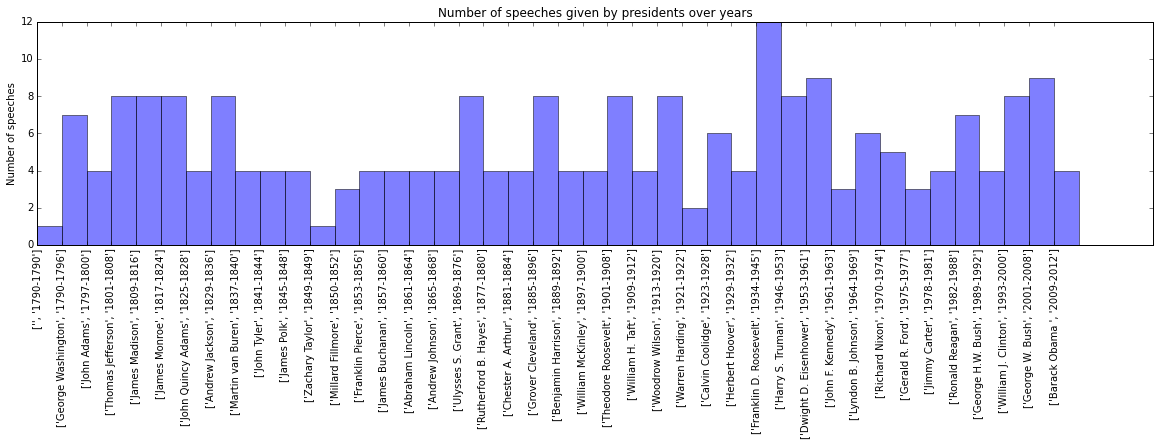

In [13]:

#No. of speeches given

fig,axes = plt.subplots(1,figsize=(20,4))
x= range(len(main_df))
y = main_df.speech_count
axes.bar(x,y,width = 1,alpha = 0.5)
axes.set_xticks(x)

year_term=[]
for i in main_df.year:
     year_term.append('-'.join(str(ii) for ii in i))
  
xtickname=[]
for i in range(len(main_df)):
    xtickname.append( [str(main_df.index[i])] + [year_term[i]])


axes.set_xticklabels(xtickname,rotation =90)
axes.set_title('Number of speeches given by presidents over years')
axes.set_ylabel('Number of speeches')

plt.show()
#Number of years vs number of speeches for each president
#Avg number of speeches.. total no. of speeches/ total no. of years of presidency

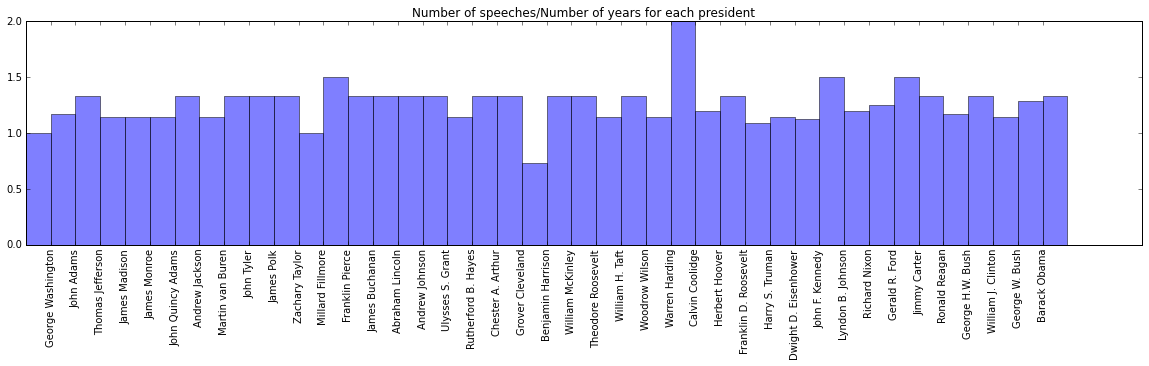

In [14]:
no_of_year=[]
for i in main_df.year:
     no_of_year.append(i[1]-i[0])
        
fig,axes = plt.subplots(1,figsize=(20,4))
x= range(len(main_df))
y = [ (float(main_df.speech_count[n])/no_of_year[n] if no_of_year[n]>0 else 1)for n in range(len(no_of_year))  ]
axes.bar(x,y,width = 1,alpha = 0.5)
axes.set_xticks(x)
axes.set_xticklabels(main_df.index,rotation=90)
axes.set_title("Number of speeches/Number of years for each president")
plt.show()

In [15]:
#Combining all the speeches for a given president
tt= su_Df.groupby('pres')['speech'].agg(sum)

#Just a test that agg worked right for eg: Franklin D. Roosevelt
len(tt.loc['Franklin D. Roosevelt']) # by aggregation

fr = su_Df[su_Df.pres == 'Franklin D. Roosevelt']
sum(len(n) for n in fr['speech']) #or
[sum(fr['speech'].apply(lambda n: len(n))), len(tt.loc['Franklin D. Roosevelt'])]


[22851, 22851]

In [16]:
su_Df.head()

,year,pres,speech,total words
0,1790,,"[george, washingtonnjanuary, 8, 1790nnfellowci...",407
1,1790,George Washington,"[nstate, union, addressngeorge, washingtonndec...",520
2,1791,George Washington,"[nstate, union, addressngeorge, washingtonnoct...",778
3,1792,George Washington,"[nstate, union, addressngeorge, washingtonnnov...",725
4,1793,George Washington,"[nstate, union, addressngeorge, washingtonndec...",718
